In [1]:
import pandas as pd 

In [88]:
edge_list = pd.read_csv('DataDiatomGNN_GTstudentprojectGT/EdgeList_GTstudentproject_Watershed=Loire-Bretagne_477MostFrequentTaxa_RelAb_spearman_rhothr=0.0321.csv', sep=';')
edge_list['Cooc'] = edge_list['Cooc'].str.replace(',','.')
edge_list['Cooc'] = edge_list['Cooc'].astype(float)

100%|██████████| 2519/2519 [00:05<00:00, 423.32it/s]


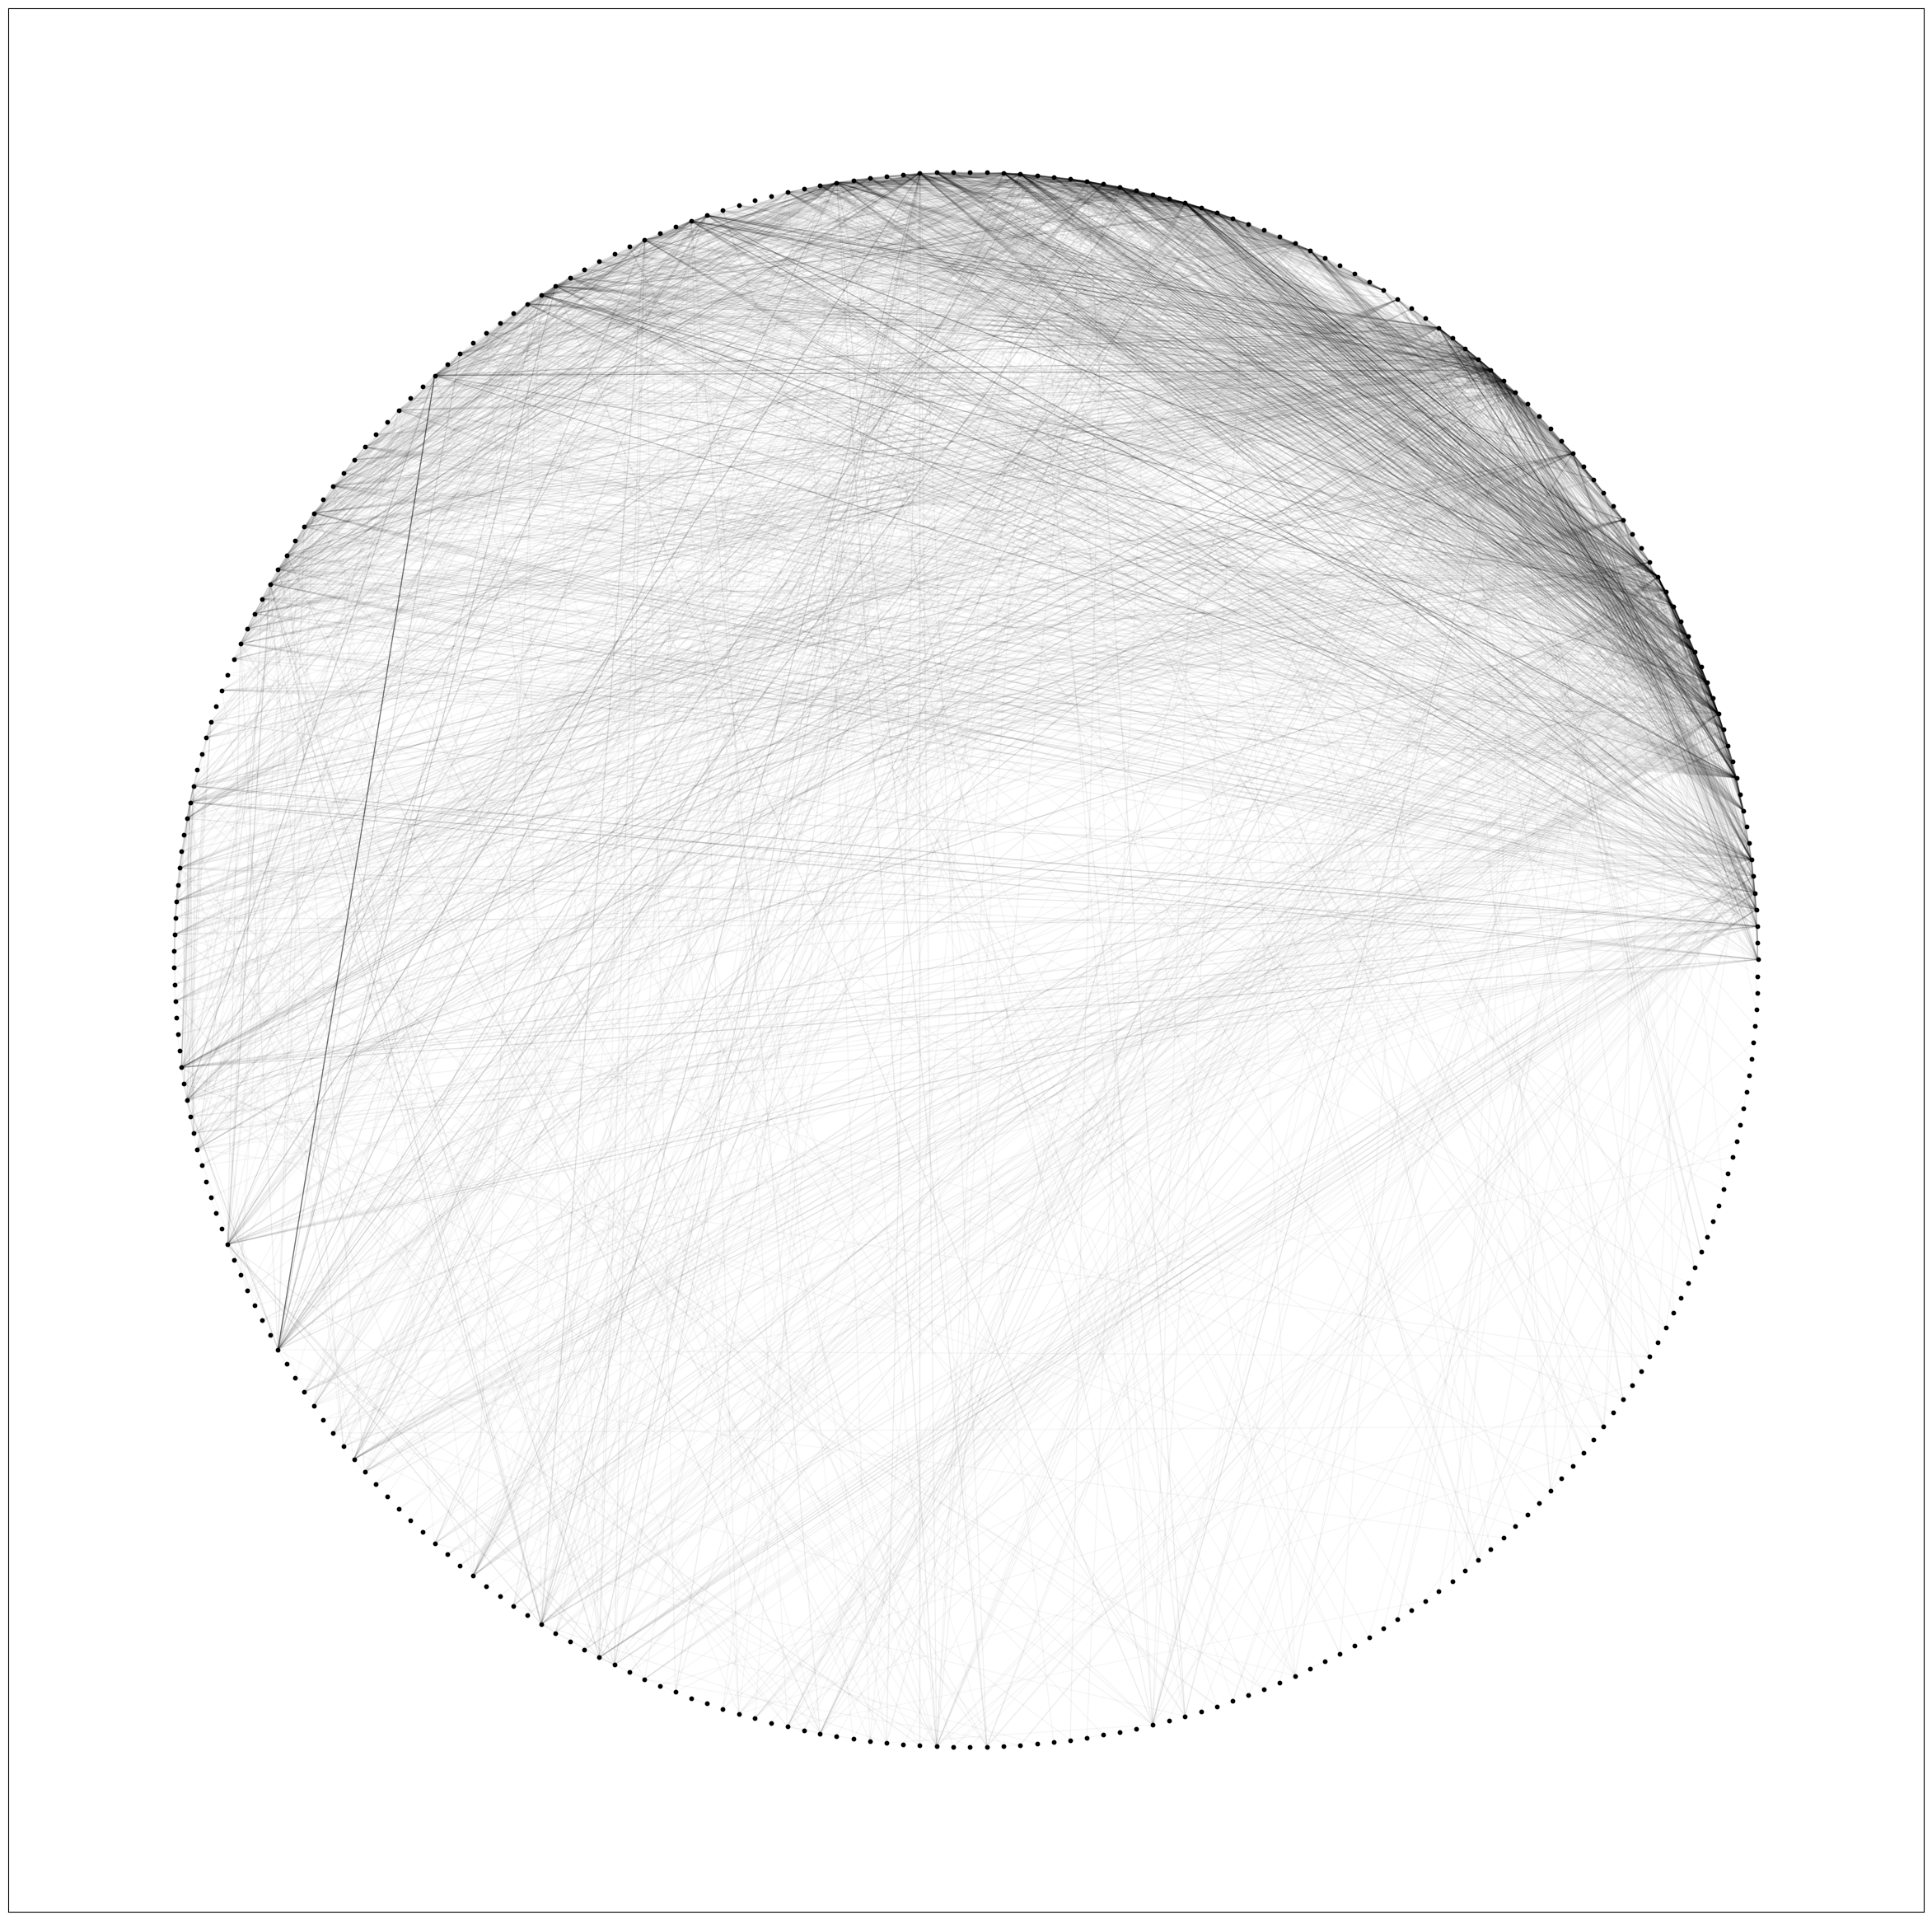

In [116]:
# visualize the edge list graph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

cleaned = edge_list.copy()
cleaned = cleaned[cleaned['Cooc'] > 0]
cleaned = cleaned[cleaned['TaxonCode_1'] != cleaned['TaxonCode_2']]
cleaned_G = nx.from_pandas_edgelist(cleaned, 'TaxonCode_1', 'TaxonCode_2', ['Cooc'])
G = nx.from_pandas_edgelist(edge_list, 'TaxonCode_1', 'TaxonCode_2', ['Cooc'])
plt.figure(figsize=(30, 30))
options = {
    'node_color':'black',
    'node_size':10
}
node_pos = nx.circular_layout(cleaned_G)
nx.draw_networkx_nodes(cleaned_G,pos=node_pos, **options)
for node1, node2, weight in tqdm(cleaned_G.edges(data='Cooc')):
    if node1 == node2:
        continue
    if weight < 0:
        if weight < -1:
            nx.draw_networkx_edges(cleaned_G, pos=node_pos, edgelist=[(node1, node2)], alpha=1, edge_color='red')
        else:
            nx.draw_networkx_edges(cleaned_G, pos=node_pos, edgelist=[(node1, node2)], alpha=-weight, edge_color='red')
    else:
        if weight > 1:
            nx.draw_networkx_edges(cleaned_G, pos=node_pos, edgelist=[(node1, node2)], alpha=1)
        else:
            nx.draw_networkx_edges(cleaned_G, pos=node_pos, edgelist=[(node1, node2)], alpha=weight)
plt.show()

In [92]:
# save the graph
nx.write_gexf(G, 'entire_graph.gexf')

In [93]:
import pickle as pkl
diatoms_per_sampling_operation = pkl.load(open('diatoms_per_sampling_operation.pkl', 'rb'))

In [94]:
with open('taxon_to_onehot.txt', 'rb') as f:
    taxons = f.readlines()
    taxons = [x.decode('utf-8').strip() for x in taxons]
sampling_ops = list(diatoms_per_sampling_operation.keys())

100%|██████████| 210/210 [00:00<00:00, 1600.88it/s]


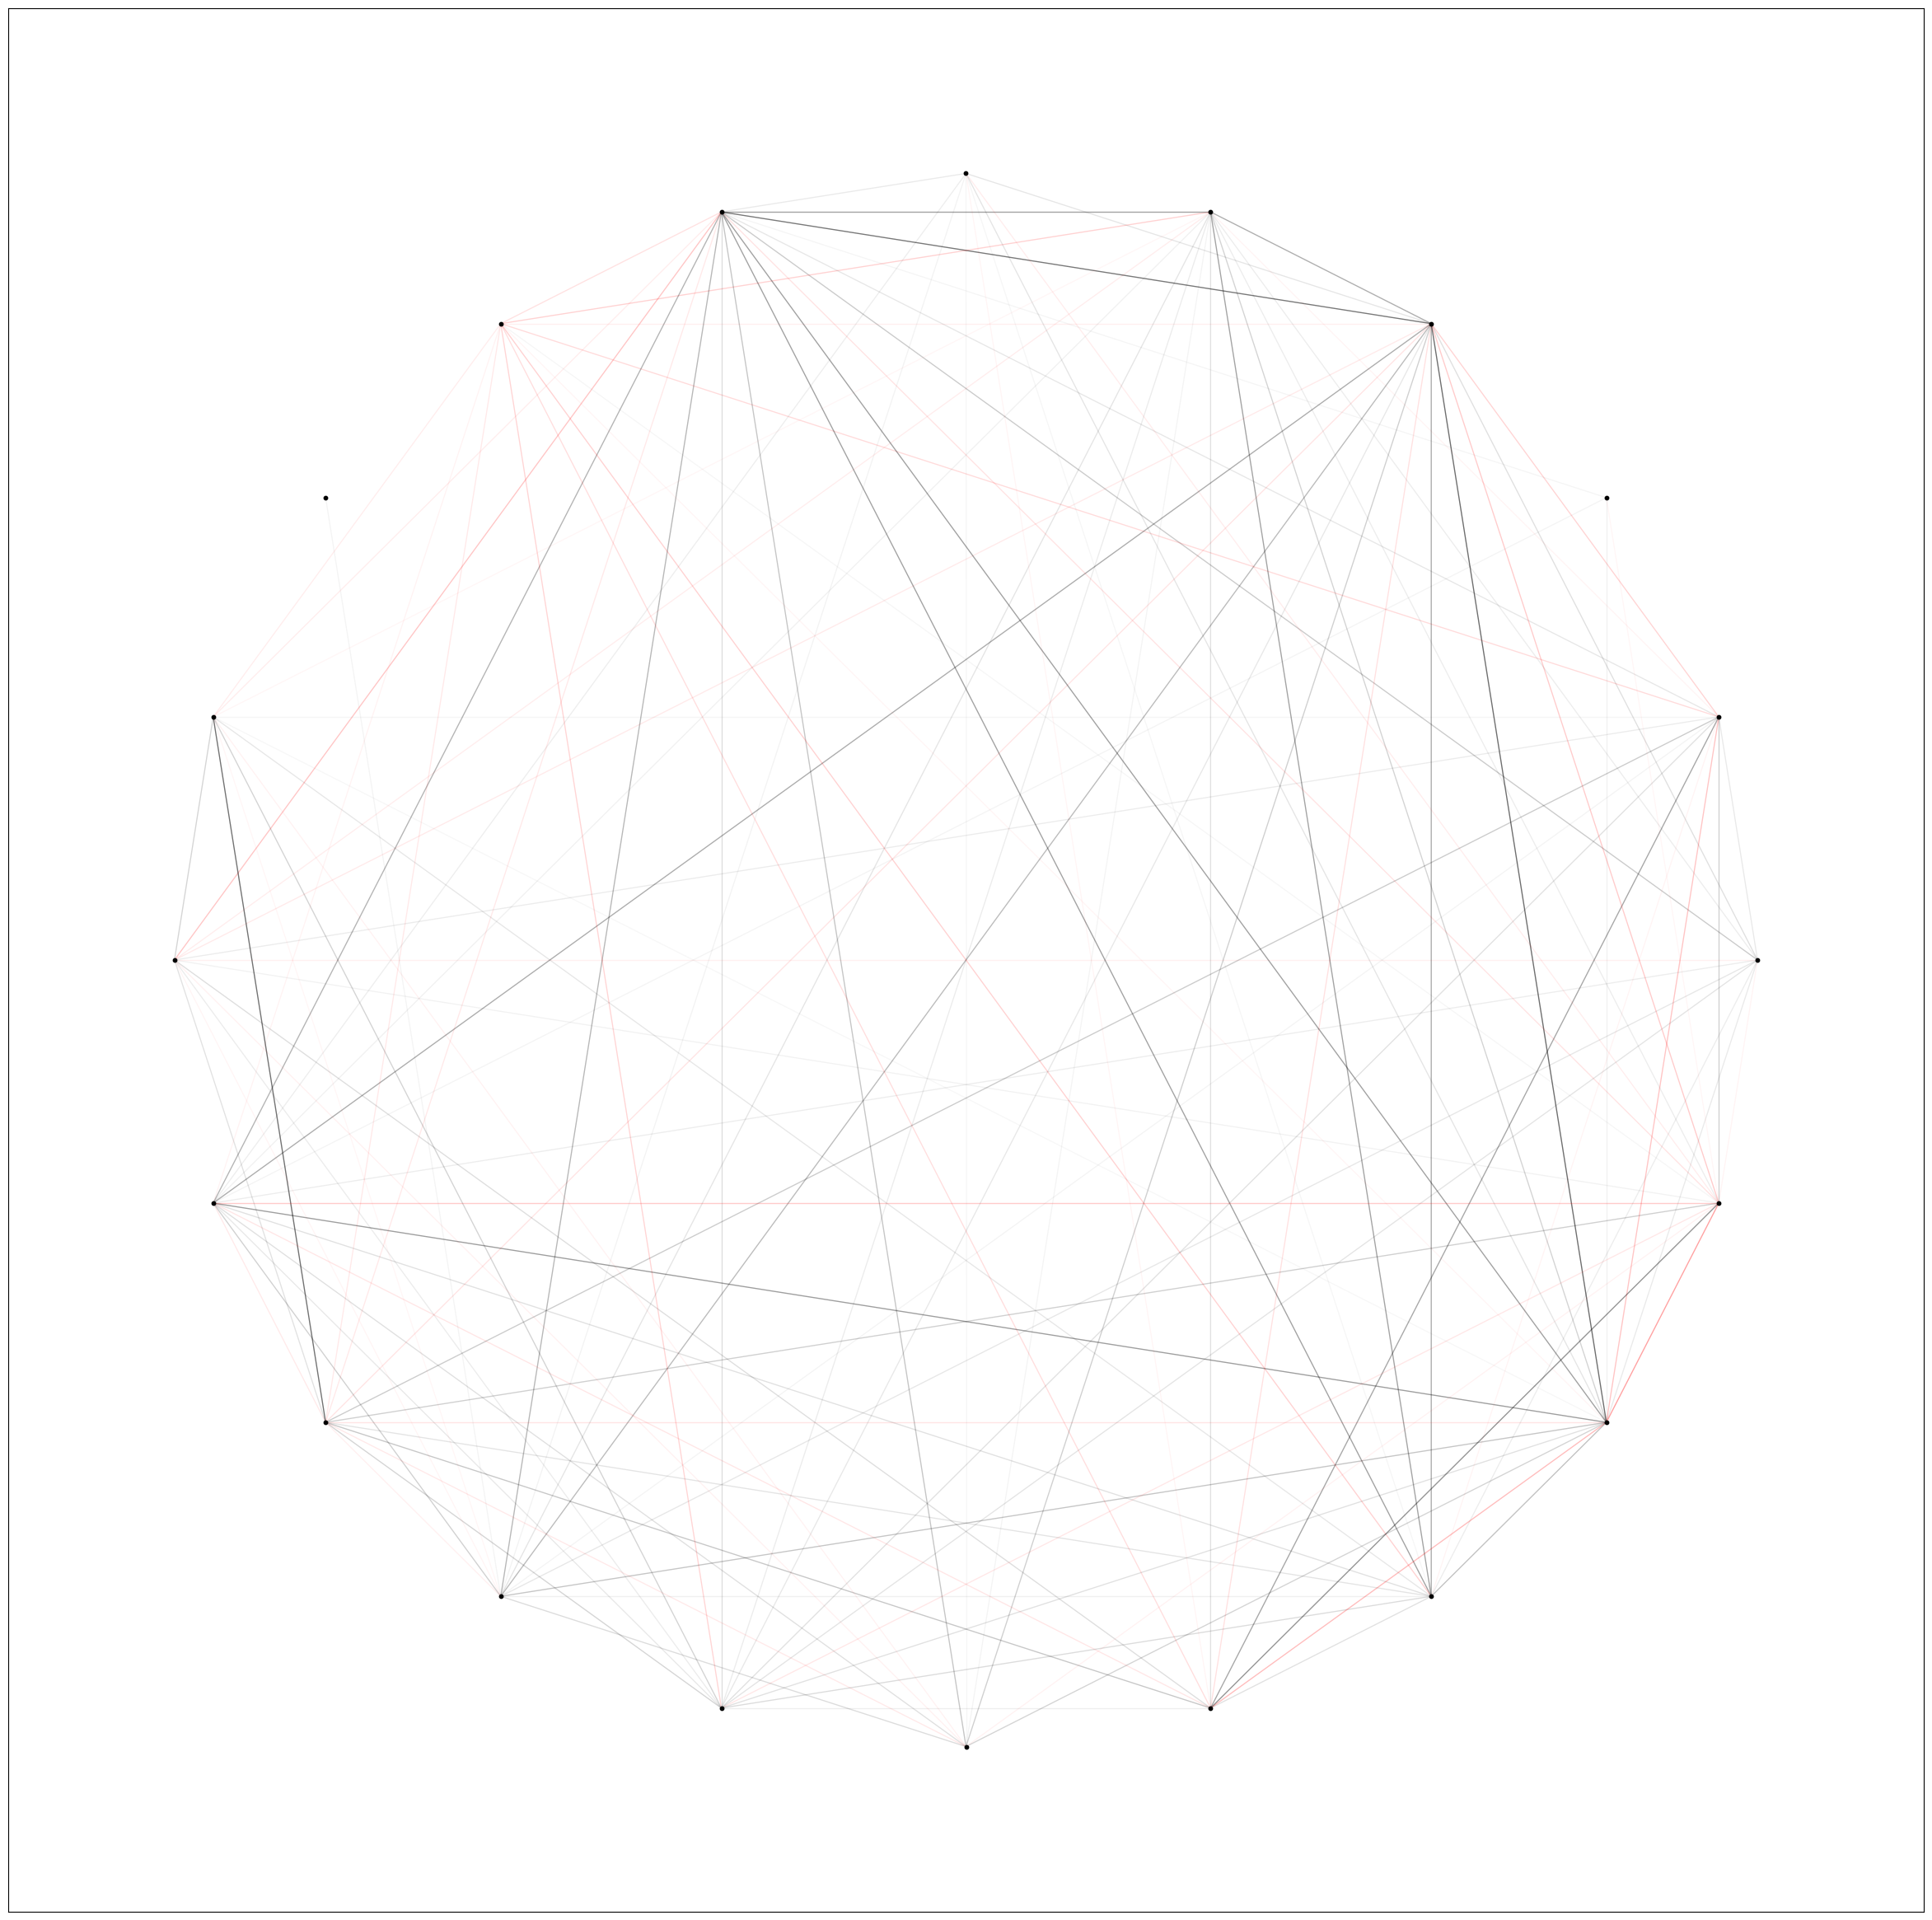

In [115]:
sampling_op = sampling_ops[0]
present_diatoms = diatoms_per_sampling_operation[sampling_op]
present_taxon_codes = [taxons[i] for i in present_diatoms['onehot']]
G_sub = G.subgraph(present_taxon_codes)
plt.figure(figsize=(30, 30))
options = {
    'node_color':'black',
    'node_size':10
}
node_pos = nx.circular_layout(G_sub)
nx.draw_networkx_nodes(G_sub,pos=node_pos, **options)
for node1, node2, weight in tqdm(G_sub.edges(data='Cooc')):
    if node1 == node2:
        continue
    if weight < 0:
        if weight < -1:
            nx.draw_networkx_edges(G_sub, pos=node_pos, edgelist=[(node1, node2)], alpha=1, edge_color='red')
        else:
            nx.draw_networkx_edges(G_sub, pos=node_pos, edgelist=[(node1, node2)], alpha=-weight, edge_color='red')
    else:
        if weight > 1:
            nx.draw_networkx_edges(G_sub, pos=node_pos, edgelist=[(node1, node2)], alpha=1)
        else:
            nx.draw_networkx_edges(G_sub, pos=node_pos, edgelist=[(node1, node2)], alpha=weight)
plt.show()

